# Import Libraries and load dataset

In [3380]:
# Import Libraries and load datasetimport warnings
import warnings
warnings.filterwarnings('ignore')

In [3381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3382]:
credit_df = pd.read_excel("Credit Card Customer Data.xlsx")
credit_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3383]:
credit_df.shape

(660, 7)

In [3384]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [3385]:
credit_df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

* Sl_No is just the index of each row so we can disregard it: unique for each row.
* Customer Key has duplications that we can check. If the duplications are different, we can take the average for them, Since Customers have to be unique.

In [3386]:
# find duplicate rows 
dupes = credit_df[credit_df.duplicated(subset='Customer Key', keep=False)]
dupes

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


these are all duplicates by Customer Key

In [3387]:
# and the values are:
dupes['Customer Key'].unique()

array([47437, 37252, 97935, 96929, 50706], dtype=int64)

In [3388]:
# we can make the customer key unique by grouping the data and round it >> of course it would affect the 5 keys above only

# credit_df = credit_df.groupby('Customer Key',as_index = False,).mean().round()
credit_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3389]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


655 rows remain, averaged for the duplicate rows, and rounded since we need integers

In [3390]:
# the Sl_No and Customer Key is not needed now, we can drop it
credit_df.drop(['Sl_No', 'Customer Key'], axis = 1, inplace = True)
credit_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [3391]:
# create two copies of dataframe for checking the methods

credit_df_Kmeans = credit_df.copy()
credit_df_HC = credit_df.copy()

In [3392]:
# let's try some feature engineering

# columns1 = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank']
# columns2 = ['Total_visits_online','Total_calls_made']
  
# for i in columns1:
#     for j in columns2:
#             bina = credit_df[i]+credit_df[j]
#             credit_df[str(i) + '&' + str(j)] = bina
        
# credit_df.head()

Creating more features didn't make the silhouette coeff better, I discarded it

## EDA

### Univariate

In [3393]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


The data seem to be good quality, no extreme values. We will check the outliers.

In [3394]:
credit_df.skew()

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

In [3395]:
columns = credit_df.columns.to_list()
columns

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

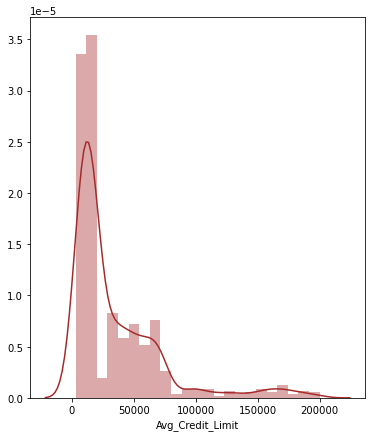

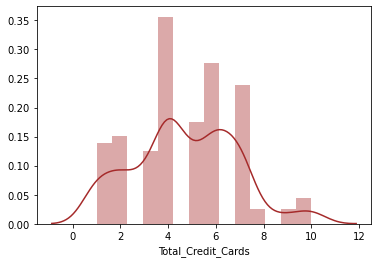

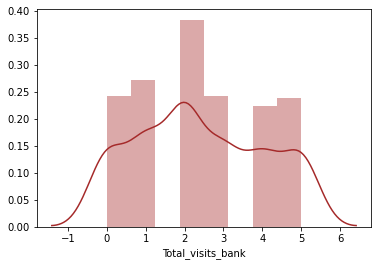

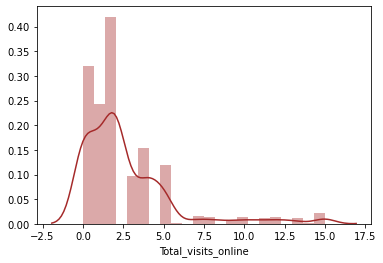

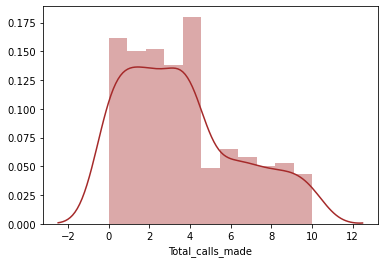

In [3396]:
plt.figure(figsize= (6,7))
for i in credit_df[columns]:
    sns.distplot(credit_df[i], color = 'brown')
    plt.show()

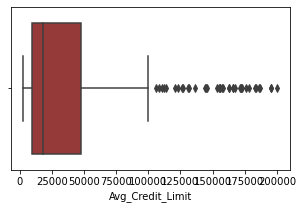

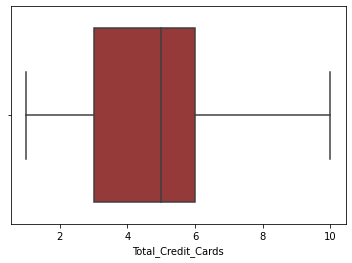

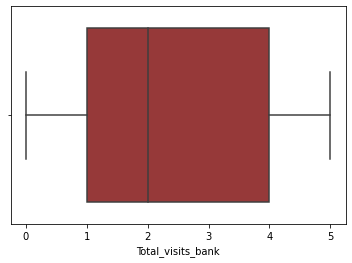

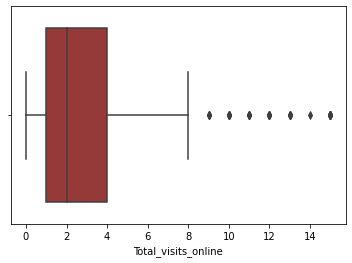

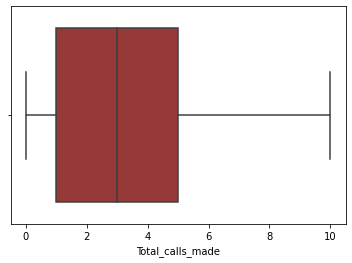

In [3397]:
# Outliers can be found in these colunns:

plt.figure(figsize= (5,3))
for i in credit_df[columns]:
    sns.boxplot(credit_df[i], color = 'brown')
    plt.show()

Avg_Credit_Limit and Total_Visits_Online need to be fixed for outliers

In [3398]:
# Let's remove some of these outliers:

credit_df['Avg_Credit_Limit'] = np.log(credit_df['Avg_Credit_Limit'])
credit_df['Total_visits_online'] = np.log(credit_df['Total_visits_online']+1)
credit_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,11.512925,2,1,0.693147,0
1,10.819778,3,0,2.397895,9
2,10.819778,7,1,1.386294,4
3,10.308953,5,1,0.693147,4
4,11.512925,6,0,2.564949,3


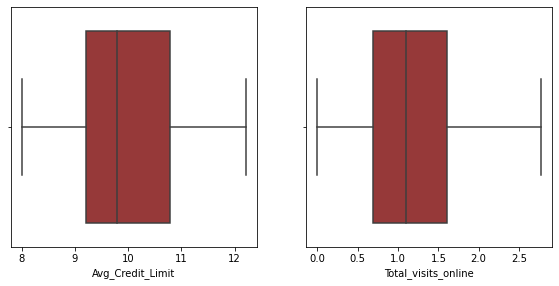

In [3399]:
# Let's look at it again in the plot

plt.figure(figsize= (15,15)) # setting the figure size
pos = 1
for i in credit_df[['Avg_Credit_Limit','Total_visits_online']]:
    plt.subplot(3, 3, pos)
    sns.boxplot(credit_df[i], color = 'brown')
    pos += 1  # to plot over the grid one by one 

Outliers have been removed

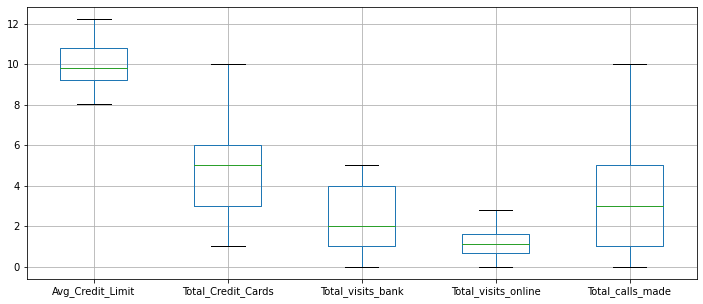

In [3400]:
# Let's see all of them together
plt.figure(figsize= (12,5))
credit_df.boxplot()
plt.show()

### Bivariate

<Figure size 360x360 with 0 Axes>

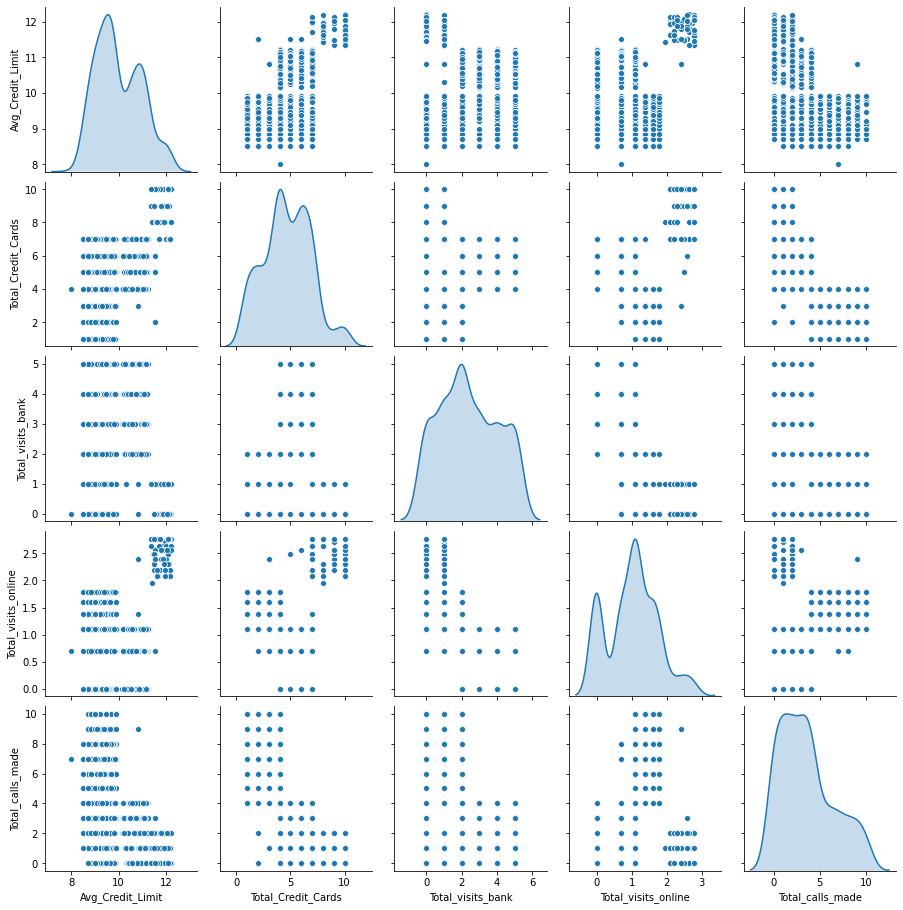

In [3401]:
plt.figure(figsize=(5,5))
sns.pairplot(credit_df,diag_kind='kde' )
plt.show()

we can see about four peaks (some are not too sharp but are there) in the plots that can suggest 4 clusters will be enough

or maybe the the number of visits to the bank which has 5 values

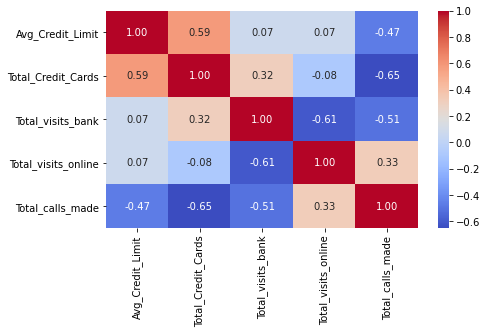

In [3402]:
plt.figure(figsize=(7,4))
sns.heatmap(credit_df.corr(),annot=True,fmt='.2f',cmap='coolwarm' )
plt.show()

strong correlations between calls made and number of credit cards but not very strong. The data seem to be independent, which is a good sign for clustering

## K-means clustering

### Scaling the data with z-score

In [3403]:
from scipy.stats import zscore

credit_df.dtypes
numeric_cols = credit_df.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols

## Scaling the data with z-score
credit_df[numeric_cols] =credit_df[numeric_cols].apply(zscore)
credit_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,-0.468807,-1.251537
1,0.885387,-0.787585,-1.473731,1.937062,1.891859
2,0.885387,1.058973,-0.860451,0.509415,0.145528
3,0.336281,0.135694,-0.860451,-0.468807,0.145528
4,1.630478,0.597334,-1.473731,2.172822,-0.203739


### create a range of clusters, plot, then select the turning point

In [3404]:
from sklearn.cluster import KMeans

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(credit_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

kmeans_cluster_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
kmeans_cluster_df[0:15]

,num_clusters,cluster_errors
0,1,3300.000000
1,2,1877.020722
2,3,1184.686769
3,4,955.730804
4,5,865.908818
5,6,787.201852
6,7,720.551657
7,8,673.144449
8,9,639.337698
9,10,601.612316


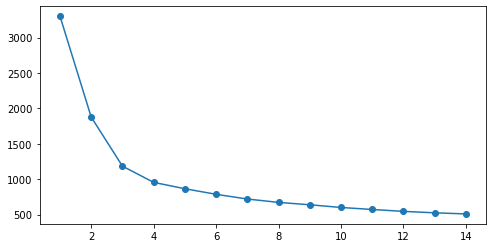

In [3405]:
from matplotlib import cm

plt.figure(figsize=(8,4))
plt.plot( kmeans_cluster_df.num_clusters, kmeans_cluster_df.cluster_errors, marker = "o" )

the turning point is between 3 and 4 but we need to select an integer so we need to compare the two

### Testing cluster numbers

n_clusters:  3 bins:  [225 384  51]
silhouette:  0.505880385853069

n_clusters:  4 bins:  [224  51 167 218]
silhouette:  0.4440357568757711

n_clusters:  5 bins:  [224 167 118 100  51]
silhouette:  0.4220211664256384

n_clusters:  6 bins:  [119 167  51 118 105 100]
silhouette:  0.5170277908891467

n_clusters:  7 bins:  [119 105 105 119 100  50  62]
silhouette:  0.4330081060411743

n_clusters:  8 bins:  [119  39 119  50 105  62 105  61]
silhouette:  0.5012322185863525



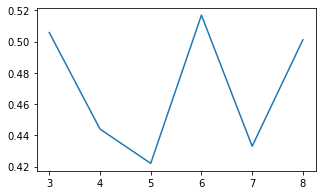

In [3406]:
silh = []
r = range(3,9,1)

for i in r:
    kmeans = KMeans(n_clusters=i, n_init = 5, random_state=1)
    kmeans.fit(credit_df)

    # Check the number of data in each cluster
    labels = kmeans.labels_
    counts = np.bincount(labels[labels>=0])
    print("n_clusters: ", i, "bins: ",counts)

    # add the prediction to the data then check how it fits to the groups
    predictions = kmeans.predict(credit_df)
    credit_df["group"] = predictions
    sc = silhouette_score(credit_df,labels)
    
    # silhouette coeff and append the list
    print("silhouette: ", sc)
    print("")
    silh.append(sc)

# plotting the silhouette coefficients
graph_silh = {'x': r, 'y': silh}
df_silh = pd.DataFrame(graph_silh)
plt.figure(figsize=(5,3))
plt.plot(df_silh['x'], df_silh['y']);

# drop the added iteration group from "for"
credit_df.drop(['group'], axis = 1, inplace = True)

In [3407]:
max_silh = df_silh['y'].max()
best_group = df_silh['x'][df_silh['y'] == max_silh]
best_group


3    6
Name: x, dtype: int64

### apply on original data

In [3408]:
# using best cluster number

kmeans_best = KMeans(n_clusters=4, n_init = 5, random_state=1)
kmeans_best.fit(credit_df)
predictions = kmeans_best.predict(credit_df)   

# apply on separated dataframe for check

credit_df_Kmeans['group'] = predictions
# credit_df_Kmeans.boxplot(by = 'group', figsize=(15, 10))

credit_df_Kmeans = credit_df_Kmeans.groupby(['group'])
credit_df_Kmeans.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
group,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,12269.461078,5.473054,3.604790,1.000000,1.928144
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,50187.214612,5.547945,3.401826,0.968037,2.054795


Conclusion:

4 segments of customers was used because the silhouett number seems high for them as well as there are some key differences between the groups:

0. low credit limit, low number of credit cards, low number of visits to bank, medium online activity, many calls made
1. low credit limit, medium number of credit cards, high number of visits to bank, low online activity, not many calls made
2. medium credit limit, medium number of credit cards, high number of visits to bank, low online activity, medium number of calls made
3. high credit limit, high number of credit cards, low number of visits to bank, high online activity, not many calls made

Recommendation: based on the groups above, group 2 & 3 could receive better online experience to engage them online, or 1 & 3 should receive better phone service eperience, to balance out the phone and online services.

## Hierarchical clustering

### check best linkage

In [3409]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering 

In [3410]:
# let's check which linkage would be the best to use

linkages = ["ward", "complete", "average", "single"]

for i in linkages:
    Z = linkage(credit_df, metric = 'euclidean', method = i)
    c, coph_dists = cophenet(Z , pdist(credit_df))
    print("linkage: ", i, ", cophenet: ", c)
    print(" ")

linkage:  ward , cophenet:  0.7646783384784501
 
linkage:  complete , cophenet:  0.8101657057028302
 
linkage:  average , cophenet:  0.8492731094268278
 
linkage:  single , cophenet:  0.6183544852599762
 


Seems like "average" is the best clustering method

### check best number of clusters

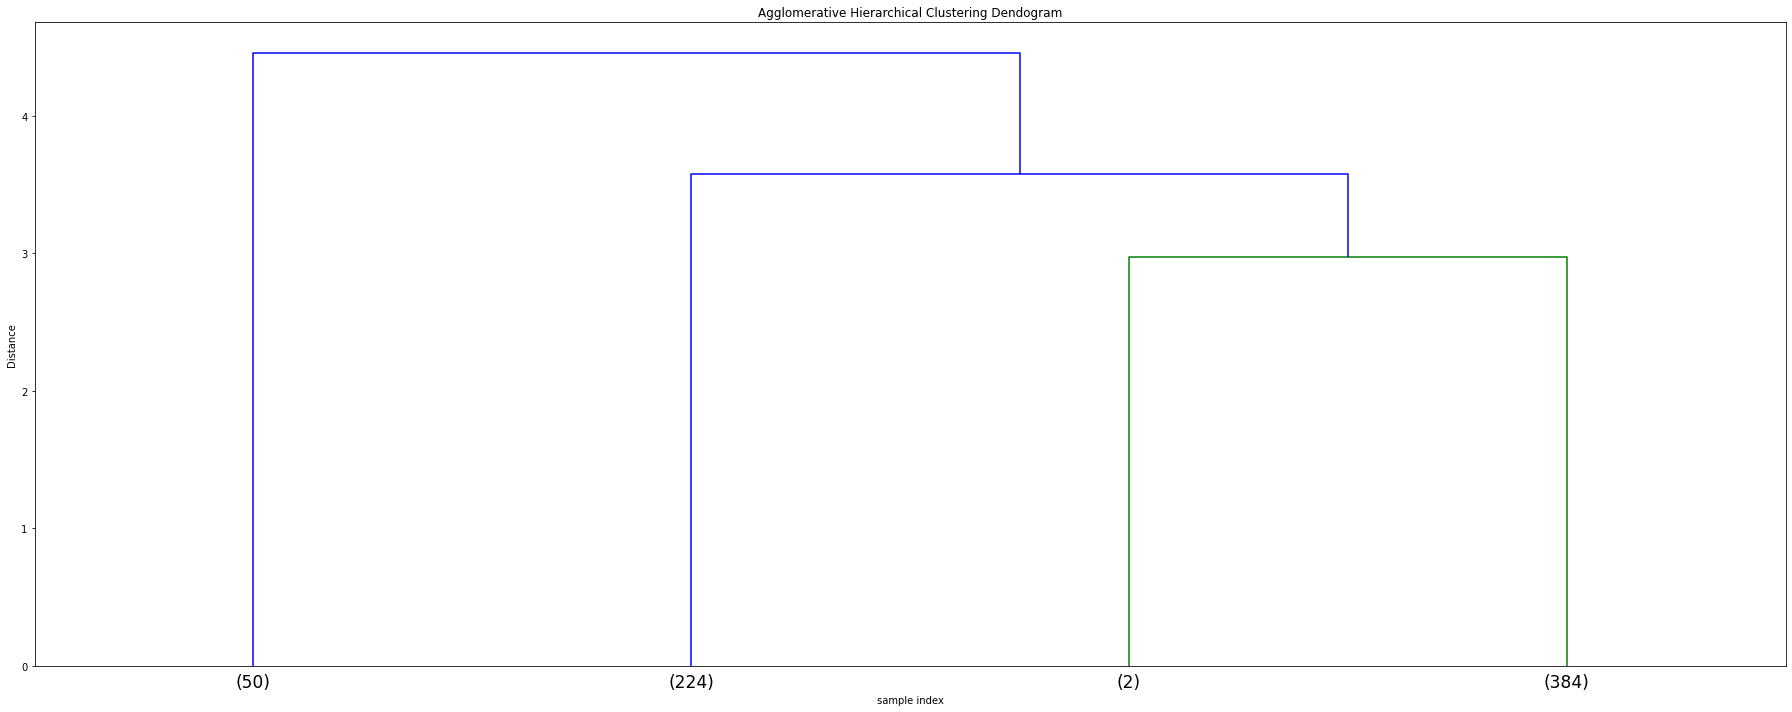

In [3411]:
Z_best = linkage(credit_df, metric = 'euclidean', method = "average")

# dendogram
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_best, leaf_rotation = 0., leaf_font_size = 17., truncate_mode = 'lastp', p = 4)
plt.tight_layout()

### check silhouette

for max_d:  2.4 silhouette:  0.3400343446817072
for max_d:  2.6 silhouette:  0.39193287371525737
for max_d:  2.8 silhouette:  0.39193287371525737
for max_d:  3.0 silhouette:  0.4839471543805206
for max_d:  3.2 silhouette:  0.4839471543805206
for max_d:  3.4 silhouette:  0.4839471543805206
for max_d:  3.6 silhouette:  0.4155608398681288
for max_d:  3.8 silhouette:  0.4155608398681288
for max_d:  4.0 silhouette:  0.4155608398681288
for max_d:  4.2 silhouette:  0.4155608398681288
for max_d:  4.4 silhouette:  0.4155608398681288


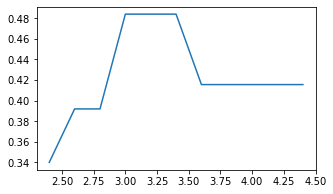

In [3412]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score### check best number of clusters

r_hc = range(24,46,2) # this is our max_d for the clusters
silh_hc = []
j_hc = []

for i in r_hc:
    j = i/10
    clusters_hc = fcluster(Z_best, j, criterion='distance')
    sc_hc = silhouette_score(credit_df,clusters_hc)
    print("for max_d: ", j, "silhouette: ", sc_hc)
    
    silh_hc.append(sc_hc)
    j_hc.append(j)

# plotting the silhouette coefficients
graph_silh_hc = {'x': j_hc, 'y': silh_hc}
df_silh_hc = pd.DataFrame(graph_silh_hc)
plt.figure(figsize=(5,3))
plt.plot(df_silh_hc['x'], df_silh_hc['y']);

In [3413]:
hc_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
hc_model.fit(credit_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

### apply on original data

In [3414]:
# apply on separated dataframe for check

credit_df_HC['labels'] = hc_model.labels_
credit_df_HC = credit_df_HC.groupby(['labels'])
credit_df_HC.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12138.392857,2.419643,0.941964,3.558036,6.883929
1,57500.000000,2.500000,0.500000,1.000000,0.500000
2,33679.687500,5.526042,3.500000,0.979167,2.000000
3,141040.000000,8.740000,0.600000,10.900000,1.080000


Conclusion:

4 segments of customers was used because the silhouett number seems high for them as well as there are some key differences between the groups:

* 0 - low credit limit, low number of credit cards, low number of visits to bank, medium online activity, many calls made

* 2 - low-medium credit limit, medium number of credit cards, high number of visits to bank, low online activity, not many calls made

* 3 - medium credit limit, low number of credit cards, low number of visits to bank, low online activity, not many calls made

* 1 - high credit limit, high number of credit cards, low number of visits to bank, high online activity, not many calls made


Kmeans and Hierarchical Clustering  groups have a lot in common but in this case I would use Kmeans because is has more evenly distributed clusters and distinc groups